# Kolmogorov Arnold Networks

Klasicke neuronove site, resp. jejich duvera v ne, je zalozena na tzv. [Universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).. Ten rika, ze
 MLP (Multi-Layer Perceptron) je schopen aproximovat libovolnou spojitou funkci. From wikipedia: 

Given a family of neural networks, for each function $f$ from a certain function space, there exists a sequence of 
neural networks $ \phi_1, \phi_2, \dots $ from the family, such that $ \phi_n \rightarrow f $ according to some 
criterion. That is, the family of neural networks is dense in the function space. 

Naproti tomu KAN jsou zalozeny na Kolmogorov-Arnold representation theoremu, ktery rika, ze kazda spojita funkce vice 
promennych $f:[0,1]^n \rightarrow R$ se da zapsat jako suma (superpozice) spojitych jednopromennych funkci.

Navic se da ukazat, ze $f$ muze byt zapsana jako konecna suma spojitych funkci jedne promenne a binarni operace scitani. 
$$
    f(x_1, ..., x_n) = \sum_{q=0}^{2n} \Phi_q \left( \sum_{p=1}^n \phi_{q,p}(x_p) \right)
$$

$\phi_{q,p}:[0,1] \rightarrow R$ a $\Phi_q: R \rightarrow R$

Prvni KAN site byly studovany uz drive - 2002. Prvni breakthrough byl v roce 2021: [Ming-Jun Lai and Zhaiming Shen. The kolmogorov superposition theorem can break the curse of dimensionality when approximating high dimensional functions.](https://arxiv.org/abs/2112.09963)

# Summary of paper "KAN: Kolmogorov–Arnold Networks"

The paper titled "KAN: Kolmogorov–Arnold Networks" proposes a novel alternative to Multi-Layer Perceptrons (MLPs) called Kolmogorov-Arnold Networks (KANs). Here's an exhaustive summary of its key points:

## Motivation:
- **MLPs** are widely used in machine learning due to their universal approximation capability but have limitations in terms of interpretability, efficiency, and scaling.
- **KANs** are inspired by the Kolmogorov-Arnold Representation Theorem, which states that any multivariate function can be expressed as a finite sum of univariate functions.

## Key Differences:
- **MLPs**: Use fixed activation functions on nodes (neurons) with linear weights.
- **KANs**: Replace linear weights with **learnable 1D functions (splines)** on the edges, and activation functions are placed on edges instead of nodes. This makes KANs more expressive and interpretable.
  
"KANs have fully-connected structures. However, while MLPs place fixed activation functions on nodes (“neurons”), KANs place learnable activation functions on edges (“weights”), as illustrated in Figure 0.1. As a result, KANs have no linear weight matrices at all: instead, each weight parameter is replaced by a learn- able 1D function parametrized as a spline. KANs usually allow much smaller computation graphs than MLPs."

![image](kan_01.png)


## Architecture:
- KANs can be considered as **deep and wide networks** where each weight in a typical MLP is replaced by a spline function. This means they do not use traditional linear weights but rely on spline-based activations that can dynamically adjust based on the data.
- **Grid extension** is employed to enhance accuracy by making the splines more fine-grained during training, unlike MLPs that need more neurons and layers to improve performance.

## Benefits of KANs:
1. **Interpretability**: KANs provide easier visualization and interaction. Their use of splines allows easier explanation of how the model approximates functions.
2. **Accuracy**: KANs outperform MLPs in both low and high-dimensional function fitting, overcoming issues like the curse of dimensionality in some cases.
3. **Efficiency**: KANs generally require fewer parameters than MLPs to achieve the same or better performance.

## Theoretical Guarantees:
- The paper provides **theoretical guarantees** on the approximation power of KANs, based on smoothness assumptions of the underlying functions. These guarantees suggest that KANs have better **neural scaling laws** compared to MLPs, meaning they require fewer parameters for the same level of accuracy.
- The authors prove that KANs can avoid the **curse of dimensionality** under certain smooth function assumptions.

## Experimental Results:
- The authors performed extensive experiments showing that KANs outperform MLPs in both synthetic and real-world datasets, including toy problems, PDE solving, and scientific discovery tasks (such as knot theory and Anderson localization).
- **Scaling Laws**: KANs demonstrate faster convergence with fewer parameters compared to MLPs, confirming their theoretical advantage.

## Practical Applications:
- The paper demonstrates KAN's utility in AI-driven **scientific discovery**. For example, KANs helped rediscover mathematical formulas and physical laws by learning patterns in data, which can be useful for symbolic regression tasks.
- KANs were applied in **partial differential equation (PDE) solving** and outperformed MLPs in accuracy and interpretability.
  
## Interpretability and Interaction:
- **Simplification techniques** like pruning and symbolic representation are introduced to make KANs more interpretable. For instance, after training, KANs can be pruned to remove unnecessary neurons and connections, making the network structure simpler and easier to interpret.
- Users can interact with KANs, replacing learned functions with symbolic ones or manually pruning irrelevant parts of the network to further enhance interpretability.

## Comparison to Symbolic Regression:
- The paper contrasts KANs with symbolic regression techniques. While symbolic regression may fail on more complex functions, KANs provide smooth, continuous approximations that are more robust and user-controllable.

## Conclusion:
- **KANs** offer a powerful alternative to MLPs, with better accuracy, interpretability, and efficiency, especially in scientific computing tasks. The authors suggest that future work could further develop deeper KAN representations and apply KANs to more complex AI + Science problems.

This paper establishes KANs as promising models for tasks requiring both strong function approximation and model interpretability, suggesting their potential to impact the future of machine learning and scientific discovery.


# Exhaustive Summary of "KAN: Kolmogorov–Arnold Networks"

The paper titled **"KAN: Kolmogorov–Arnold Networks" (KANs)** introduces an alternative to the widely used **Multi-Layer Perceptrons (MLPs)**. KANs are inspired by the **Kolmogorov-Arnold Representation Theorem**, which offers a different approach to function approximation by using **learnable 1D functions (splines)** on the network's edges. Below is an in-depth summary including key formulas.

## 1. Motivation

MLPs are the foundational model for deep learning because they approximate nonlinear functions, as guaranteed by the **Universal Approximation Theorem (UAT)**. However, MLPs have drawbacks, such as:
- High parameter count for large networks.
- Limited interpretability.
- Suboptimal performance when approximating specific mathematical functions.

KANs aim to overcome these limitations by leveraging the **Kolmogorov-Arnold Representation Theorem (KAT)**, which states that any multivariate continuous function can be expressed as a finite composition of univariate continuous functions and summation.

---

## 2. Key Differences between MLPs and KANs

### MLP:
- **Fixed activation functions** on nodes.
- Linear weights between nodes.
- Universal Approximation Theorem guarantees function approximation with sufficient neurons and layers.

**MLP Formula**:
$$
\text{MLP}(x) = (W_3 \circ \sigma_2 \circ W_2 \circ \sigma_1 \circ W_1)(x)
$$
Where:
- $ W_i $ are weight matrices.
- $ \sigma_i $ are fixed activation functions.

### KAN:
- **Learnable activation functions** on edges (via splines).
- No linear weights: All weight parameters are replaced by **spline functions**.
- Nodes perform summation only.

**KAN Formula**:
$$
\text{KAN}(x) = (\Phi_3 \circ \Phi_2 \circ \Phi_1)(x)
$$
Where:
- $ \Phi_i $ are matrices of 1D spline functions that are trainable.

---

## 3. Kolmogorov-Arnold Theorem and KAN Architecture

The **Kolmogorov-Arnold Representation Theorem** provides a foundation for KANs. It expresses a continuous function $ f(x_1, \dots, x_n) $ in terms of univariate functions:

$$
f(x_1, \dots, x_n) = \sum_{q=1}^{2n+1} \Phi_q \left( \sum_{p=1}^n \varphi_{q,p}(x_p) \right)
$$
Where:
- $ \varphi_{q,p} $ are univariate functions.
- $ \Phi_q $ are outer functions that aggregate the results.

### KAN Structure:
- The activation functions between layers are **B-splines**, which allows flexibility and local control over the approximation.
- A KAN layer can be described by the set of 1D functions $ \Phi_{q,p} $ between nodes.

For a general **L-layer KAN** with input vector $ x_0 \in \mathbb{R}^{n_0} $, the output is:

$$
\text{KAN}(x) = (\Phi_{L-1} \circ \Phi_{L-2} \circ \dots \circ \Phi_0) x_0
$$

This differs from MLPs in that each layer learns univariate spline functions rather than fixed nonlinearities.

### Activation Functions as Splines:
Each activation function $ \varphi(x) $ in KAN is parameterized as a **B-spline** with learnable coefficients:

$$
\varphi(x) = w_b b(x) + w_s \sum_i c_i B_i(x)
$$
Where:
- $ B_i(x) $ are B-spline basis functions.
- b(x) is residual function = silu(x) = $x/(1 + e^{−x})$
- $ c_i $ are the trainable coefficients.
- $ w_b, w_s $ control the relative importance of the spline components.

---

## 4. Theoretical Guarantees: KAN Approximation Abilities

### Approximation Theory:
KANs can approximate any smooth function using splines, with an approximation bound:

$$
\| f - (\Phi^G_{L-1} \circ \dots \circ \Phi^G_0)(x) \|_{C^m} \leq C G^{-k-1+m}
$$
Where:
- $ G $ is the grid size of the spline.
- $ C $ is a constant depending on the function $ f $ and its representation.
- $ k $ is the spline order.
- $ m $ denotes the number of derivatives being considered.

This bound suggests that **KANs can overcome the curse of dimensionality (CoD)** in certain scenarios by decomposing high-dimensional functions into low-dimensional ones.

### Neural Scaling Laws:
KANs exhibit favorable **scaling laws**, where test loss $ \ell $ decreases with the number of parameters $ N $ as:

$$
\ell \propto N^{-\alpha}
$$
KANs achieve an optimal scaling exponent $ \alpha = 4 $ for cubic splines, outperforming MLPs, which typically have $ \alpha \approx 1 $.

---

## 5. Experimental Results

### Comparison with MLPs:
- **KANs** outperform MLPs across various tasks, including function fitting, partial differential equation (PDE) solving, and scientific discovery.
- **Pareto Frontier** comparisons show that KANs achieve lower error with fewer parameters than MLPs.
- KANs achieve better **test RMSE (Root Mean Square Error)**, especially in high-dimensional settings.

**Example Scaling Law Performance**:
- In a toy dataset $ f(x_1, x_2) = \exp(\sin(\pi x_1) + x_2^2) $, KAN achieves a test RMSE of $ \sim 10^{-3} $ with far fewer parameters than MLPs.

### Grid Extension for Accuracy:
KANs allow for **grid extension**, where the spline grids are refined to improve accuracy without retraining from scratch.

---

## 6. Practical Applications

### Scientific Discovery:
KANs can be applied in **symbolic regression** and **scientific discovery** tasks. For instance, KANs were able to rediscover known physical laws such as Anderson localization and other mathematical relations.

### Interpretability:
- KANs are more interpretable than MLPs due to their spline-based structure. Visualization techniques allow for easier understanding of how the network processes information.
- **Pruning and Symbolification**: KANs can be simplified through pruning and replaced with symbolic representations for further interpretability.

---

## 7. Comparison to Symbolic Regression

KANs offer a **continuous function approximation** that is more robust than symbolic regression, especially when the target function is not purely symbolic. KANs can approximate complex, non-symbolic functions (e.g., special functions like Bessel functions) by using splines.

---

## 8. Conclusion

**Kolmogorov-Arnold Networks (KANs)** offer:
- Higher **interpretability** due to learnable splines and a clear mathematical foundation.
- Better **scaling properties** compared to MLPs.
- Potential to **overcome the curse of dimensionality** in some tasks.

KANs represent a promising alternative to MLPs, particularly in tasks that require high accuracy, interpretability, and efficiency. Their use in AI-driven scientific discovery, function approximation, and symbolic regression is likely to grow.


# Challenges and Considerations
* Increased Training Time: The process of learning the coefficients for the basis functions within the activation functions can be computationally expensive. This translates to longer training times and more RAM requirements for KANs compared to MLPs, especially for complex network architectures.
* Hyperparameter Tuning: KANs introduce new hyperparameters related to the selection and number of basis functions used. Finding the optimal configuration for these hyperparameters requires more effort compared to tuning the simpler MLP architecture.
* KANs may overfit to everything: In this experiment, KANs fitted the pure random data in the features to the labels provided, with an extremely high accuracy. This is troublesome.


# Basic KAN Hyperparameters
## Width
* In a standard neural network, width refers to the number of neurons in a hidden layer. In KANs, the concept is similar but focuses on the number of basis functions used to construct the activation functions within each layer.
* A wider KAN (more basis functions) allows for more complex and expressive activations, potentially leading to better performance on specific tasks.
* However, increasing width can also lead to longer training times and potential overfitting.

## Grid
* KANs utilize B-splines (or similar techniques) to define the activation functions. These B-splines are constructed on a grid of points.
* The grid defines the interval over which the activation function operates and the level of detail it can capture.
* A finer grid (more points) allows for capturing finer details in the data but can also increase computational cost and also overfit.
## k
* This parameter is related to the specific type of B-spline used in the activation function. It determines the degree of smoothness of the B-spline. As you may suspect, we may also use k as a regularization tool.
* A higher k value leads to smoother B-splines, potentially improving stability during training.
* However, a very high k might limit the flexibility of the activation function.

## Key Points:
* Width, grid, and k are all hyperparameters in KANs that need to be tuned for optimal performance on a specific task.
* There’s a trade-off between expressivity, training time, and potential overfitting when choosing these values.

# Protiargument

However, back in 1989, [2] argue that Kolmogorov’s Theorem isn’t helpful for creating practical neural networks for a few reasons:
1. Complexity of Helper Functions: For Kolmogorov’s Theorem to work, it uses some simpler functions (let’s call them “helper functions”). But for the theorem to hold up, these helper functions often end up being very complicated. If we want these helper functions to be smooth (to handle noise) and easy to work with, the theorem doesn’t work as intended. This was shown by another mathematician named Vitushkin back in 1954. In KANs, this is adjustable and we also have regularization tools.
2. Specificity of Helper Functions: In practical neural networks, we want our network to have a fixed structure that we can tweak and adjust to fit different problems. In Kolmogorov’s setup, the specific helper functions we need actually depend on the particular function we are trying to represent. This means that for every new problem, we would need a completely different set of helper functions. Well, MLPs also suffer from this problem, that’s why CNNs exist, and that’s why we fine-tune MLPs to specific domains.
3. Complexity in Practice: Even if we could use the theorem, the helper functions might end up being as complex as the original function we are trying to approximate. This defeats the purpose because we want a simpler way to handle and compute these functions. This point draws my attention, because both KANs and MLPs suffer from this issue, 35 years later. I see mathematical gymnastics all around, trying to fix issues that only an epistemological disruption could solve.

[2]. [Federico Girosi and Tomaso Poggio. Representation properties of networks: Kolmogorov’s theorem is irrelevant.](http://cbcl.mit.edu/people/poggio/journals/girosi-poggio-NeuralComputation-1989.pdf)

# Jdeme na priklady

In [1]:
from kan import KAN
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
df=pd.read_csv('creditcard.csv').reset_index()
df=df.iloc[:,1:]
df.shape

(284807, 31)

In [3]:
df=df.dropna().sample(frac=1)
df.shape

(284807, 31)

In [4]:
# t-test
selected=[]
for i in range(1,df.shape[1]-1):
    t_stat, p_value = stats.ttest_ind(df[df.Class==0].iloc[:,i], df[df.Class==1].iloc[:,i])
    if p_value<0.01 and abs(t_stat>19):
        selected.append(i)

In [5]:
import torch
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df and selected are predefined
X_train, X_test, y_train, y_test = train_test_split(np.array(df.iloc[:10000, selected]), np.array(df.Class.iloc[:10000]), test_size=0.2, random_state=42, shuffle=True)

# Move the tensors to the specified device
dataset = {}
dataset['train_input'] = torch.from_numpy(X_train).to(torch.float32)
dataset['test_input'] = torch.from_numpy(X_test).to(torch.float32)
dataset['train_label'] = torch.from_numpy(y_train).to(torch.long)
dataset['test_label'] = torch.from_numpy(y_test).to(torch.long)

# Access the tensors
X = dataset['train_input']
y = dataset['train_label']

print(dataset)

{'train_input': tensor([[ 1.3189,  0.3195, -1.0443,  ..., -1.2651, -0.0477,  0.6465],
        [ 2.1765, -1.3667, -0.4928,  ...,  1.8134,  1.1412, -0.3276],
        [-1.1688,  2.5400, -1.4461,  ...,  0.8931,  0.8394, -0.8998],
        ...,
        [-0.2081, -0.8116,  0.4426,  ..., -0.9976, -0.7670,  1.8971],
        [ 1.2238,  1.0159, -1.4956,  ..., -0.4994,  0.0302,  0.3880],
        [ 1.1330,  1.2027, -0.9538,  ..., -0.1044,  0.1344, -0.6191]]), 'test_input': tensor([[ 1.5873, -2.1955,  0.1314,  ...,  0.4243,  0.8496,  0.9607],
        [ 2.3064, -1.4083, -0.8889,  ..., -0.3812,  0.1031,  0.5782],
        [ 1.5107,  0.3406, -1.1220,  ..., -0.2393,  0.3958, -0.2667],
        ...,
        [ 1.2142,  0.7114, -0.7504,  ...,  0.0121,  0.0249, -0.9913],
        [ 1.2189,  0.2723, -0.4620,  ...,  0.1925, -0.1442, -0.4183],
        [-1.3015,  0.7456,  1.8971,  ..., -0.1795, -0.7273,  0.1095]]), 'train_label': tensor([0, 0, 0,  ..., 0, 0, 0]), 'test_label': tensor([0, 0, 0,  ..., 0, 0, 0])}


In [6]:
model = KAN(width=[3,3], grid=3, k=3)

checkpoint directory created: ./model
saving model version 0.0


In [7]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [20]:
results = model.fit(dataset, opt="Adam", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

| train_loss: 1.56e-01 | test_loss: 1.61e-01 | reg: 2.21e+01 | : 100%|█| 20/20 [00:00<00:00, 38.92it

saving model version 0.5


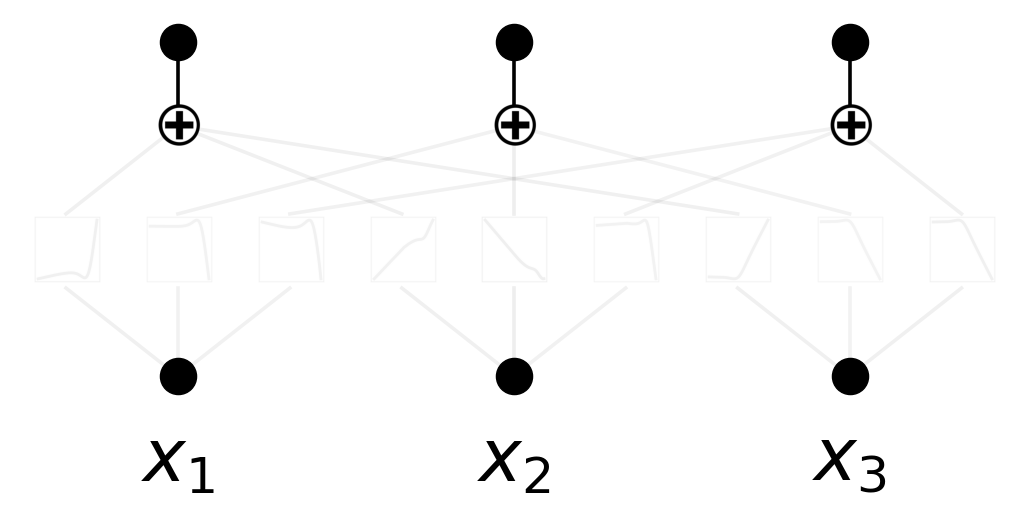

In [9]:
model.plot(beta=0.2,scale=1.3,in_vars=[r'$x_{}$'.format(i) for i in range(1,4)])

## Spline

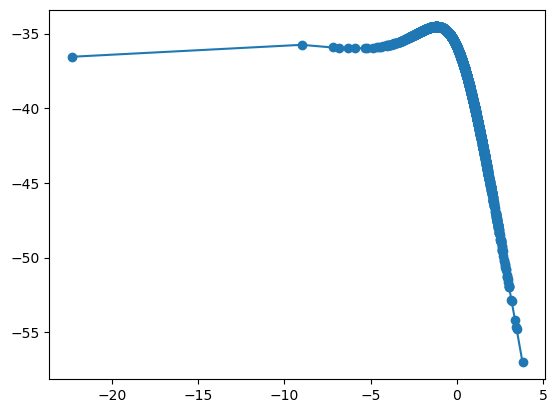

In [10]:
l = 0
i = 1
j = 2

inputs = model.spline_preacts[l][:,j,i]
outputs = model.spline_postacts[l][:,j,i]
rank = np.argsort(inputs)
inputs = inputs[rank]
outputs = outputs[rank]
plt.plot(inputs, outputs, marker="o")

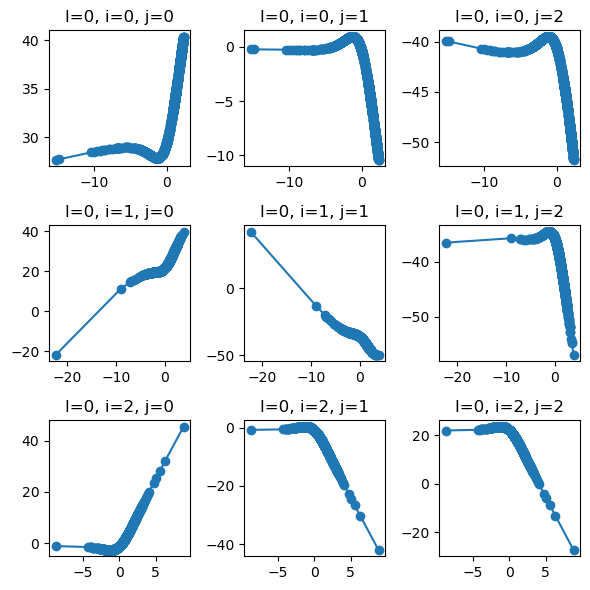

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'model' is predefined and contains 'spline_preacts' and 'spline_postacts'

# Create a figure and a grid of subplots
fig, ax = plt.subplots(3, 3, figsize=(6, 6))
l=0
# Iterate over all combinations of l, i, j
for i in range(3):
    for j in range(3):
        # Get the appropriate subplot
        inputs = model.spline_preacts[l][:, j, i]
        outputs = model.spline_postacts[l][:, j, i]
        rank = np.argsort(inputs)
        inputs = inputs[rank]
        outputs = outputs[rank]

        # Plot on the appropriate subplot
        ax[i, j].plot(inputs, outputs, marker="o")
        ax[i, j].set_title(f'l={l}, i={i}, j={j}')

# Adjust layout
plt.tight_layout()
plt.show()


## Prune

saving model version 0.2


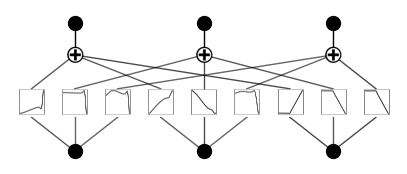

In [12]:
model = model.prune()
model(dataset['train_input'])
model.plot()
#### THEN, RETRAIN

In [13]:
results = model.fit(dataset, opt="Adam", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

| train_loss: 1.72e-01 | test_loss: 1.42e-01 | reg: 2.08e+01 | : 100%|█| 20/20 [00:00<00:00, 54.32it

saving model version 0.3


In [14]:
results['train_acc'][-1], results['test_acc'][-1]

(0.9983749985694885, 0.9994999766349792)

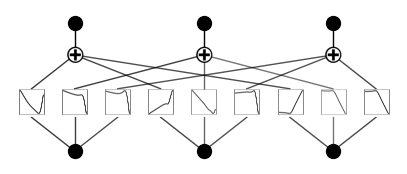

In [15]:
model.plot()

r2 is 0.9268890023231506
saving model version 0.4


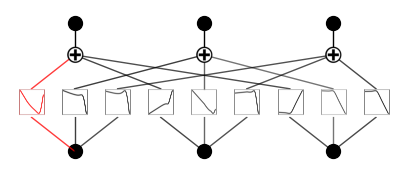

In [16]:
model.fix_symbolic(0,0,0,'sin') # Symbolification
model.plot(beta=3)

saving model version 0.5


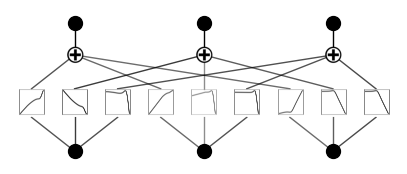

In [19]:
model.unfix_symbolic(0,0,0)
model.plot(beta=3)

In [20]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','tan','abs'] #  3 variables + BIAS -- (input, variable/activat B-spline in layer 1, variable/activat B-spline in layer 2)
model.auto_symbolic(lib=lib)
formula = model.symbolic_formula()[0][0]

fixing (0,0,0) with x, r2=0.8080490231513977, c=1
fixing (0,0,1) with x, r2=0.8639087080955505, c=1
fixing (0,0,2) with exp, r2=0.9796170592308044, c=2
fixing (0,1,0) with x, r2=0.8861002326011658, c=1
fixing (0,1,1) with x, r2=0.5791645050048828, c=1
fixing (0,1,2) with x, r2=0.5843292474746704, c=1
fixing (0,2,0) with x, r2=0.7334307432174683, c=1
fixing (0,2,1) with x, r2=0.716047465801239, c=1
fixing (0,2,2) with x, r2=0.712630569934845, c=1
saving model version 0.6


In [21]:
formula1, formula2,formula3 = model.symbolic_formula()[0] ## BIAS INCLUDED
formula1

2.85595017794273*x_1 + 2.86216707845708*x_2 + 3.22669216579962*x_3 + 113.591872646494

In the original article, the formulas (or equations) of each B-spline are in order to ensure the correct representation and approximation of the function f. The B-spline basis functions are defined over specific intervals, and their support (the region where they are non-zero) is limited. Therefore, arranging the B-spline equations in order ensures that the function f is accurately reconstructed over its entire domain by summing up these basis functions in a linear combination.

Additionally, this ordered structure is crucial for the approximation bounds. The theorem relies on the ordered application of the B-spline functions to provide a bound on the approximation error in terms of the grid size G. This ordered application maintains the continuity and differentiability properties required for the approximation to hold.

By following this order, we can systematically refine the grid (from coarse to fine) while maintaining the accuracy and stability of the approximation process. This approach is fundamental for ensuring that the approximation error decreases as the grid becomes finer, which is a key aspect of the spline-based approximation theory.

In [22]:
def acc(formula1, formula2,formula3, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):
        logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
        logit3 = np.array(formula3.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
        correct += (logit3 > logit2 > logit1) == y[i]
    return correct/batch

print('train acc of the formula:', acc(formula1, formula2,formula3, dataset['train_input'], dataset['train_label']))
print('test acc of the formula:', acc(formula1, formula2,formula3, dataset['test_input'], dataset['test_label']))

train acc of the formula: tensor(0.9977)
test acc of the formula: tensor(0.9970)


In [23]:
logit1 = np.array(formula1.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
logit3 = np.array(formula3.subs('x_1', X[i,0]).subs('x_2', X[i,1]).subs('x_3', X[i,2])).astype(np.float64)
(logit1>logit2>logit3)

False

In [24]:
(logit1>logit2>logit3).astype(float)

0.0

**However**, if we define:

df.V12=np.random.random(df.shape[0])

df.V14=np.random.random(df.shape[0])

df.V17=np.random.random(df.shape[0])

... the model will still get a 0.99 accuracy

**Explanation**:

Note that the accuracy is indeed extremely high, in both train and test sets. In fact KANs have the capability to fit any continuous function including random data, in a mechanism similar to adding uncorrelated variables to MLPs to increase accuracy. It is said that with proper regularisation, degree of smoothness of the B-spline and depth of the network, the chances of finding the optimal fitting are higher with KAN than MLP. But this statement needs empirical support.